<a href="https://colab.research.google.com/github/perarasus892/Educational-backgrounds/blob/main/Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis On Educational Backgrounds

Importing files

In [31]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [32]:
df = pd.read_csv('/content/Educational_Background_Details.csv.csv')
print(df.head())

           Education  Age   Income         City  Gender Marital Status  \
0    Master's Degree   45  34247.0      Houston    Male        Married   
1  Bachelor's Degree   35  48840.0      Houston    Male         Single   
2    Master's Degree   56  90149.0      Phoenix  Female        Married   
3   Associate Degree   46  46058.0  Los Angeles  Female        Married   
4    Master's Degree   35  59929.0      Houston  Female         Single   

               Job Role  Experience              Skills   Job Satisfaction  \
0            HR Manager         8.0               Excel  Very Dissatisfied   
1  Marketing Specialist         4.0  Project Management       Dissatisfied   
2        Data Scientist         9.0  Project Management            Neutral   
3                   NaN         3.0  Project Management          Satisfied   
4            Researcher        11.0       Communication     Very Satisfied   

  Workplace Type  
0         Hybrid  
1         Remote  
2         Hybrid  
3      In-

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         540 non-null    object 
 1   Age               600 non-null    int64  
 2   Income            550 non-null    float64
 3   City              600 non-null    object 
 4   Gender            600 non-null    object 
 5   Marital Status    600 non-null    object 
 6   Job Role          560 non-null    object 
 7   Experience        540 non-null    float64
 8   Skills            600 non-null    object 
 9   Job Satisfaction  600 non-null    object 
 10  Workplace Type    600 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 51.7+ KB


In [34]:
df.describe()

,Age,Income,Experience
count,600.000000,550.000000,540.000000
mean,40.475000,71894.129091,5.627778
std,13.804842,28498.092670,3.132860
min,18.000000,25028.000000,0.000000
25%,28.000000,46007.750000,3.000000
50%,41.000000,70981.500000,5.000000
75%,53.000000,98665.750000,8.000000
max,64.000000,119968.000000,14.000000


Checking for Null values

In [35]:
mv = df.isnull()
print(mv)

     Education    Age  Income   City  Gender  Marital Status  Job Role  \
0        False  False   False  False   False           False     False   
1        False  False   False  False   False           False     False   
2        False  False   False  False   False           False     False   
3        False  False   False  False   False           False      True   
4        False  False   False  False   False           False     False   
..         ...    ...     ...    ...     ...             ...       ...   
595      False  False   False  False   False           False     False   
596      False  False   False  False   False           False     False   
597      False  False   False  False   False           False     False   
598      False  False   False  False   False           False     False   
599      False  False   False  False   False           False     False   

     Experience  Skills  Job Satisfaction  Workplace Type  
0         False   False             False          

In [36]:
print(df.notnull())

     Education   Age  Income  City  Gender  Marital Status  Job Role  \
0         True  True    True  True    True            True      True   
1         True  True    True  True    True            True      True   
2         True  True    True  True    True            True      True   
3         True  True    True  True    True            True     False   
4         True  True    True  True    True            True      True   
..         ...   ...     ...   ...     ...             ...       ...   
595       True  True    True  True    True            True      True   
596       True  True    True  True    True            True      True   
597       True  True    True  True    True            True      True   
598       True  True    True  True    True            True      True   
599       True  True    True  True    True            True      True   

     Experience  Skills  Job Satisfaction  Workplace Type  
0          True    True              True            True  
1          True

In [37]:
print(df.isnull().sum())


Education           60
Age                  0
Income              50
City                 0
Gender               0
Marital Status       0
Job Role            40
Experience          60
Skills               0
Job Satisfaction     0
Workplace Type       0
dtype: int64


In [38]:
print(df)

             Education  Age    Income         City  Gender Marital Status  \
0      Master's Degree   45   34247.0      Houston    Male        Married   
1    Bachelor's Degree   35   48840.0      Houston    Male         Single   
2      Master's Degree   56   90149.0      Phoenix  Female        Married   
3     Associate Degree   46   46058.0  Los Angeles  Female        Married   
4      Master's Degree   35   59929.0      Houston  Female         Single   
..                 ...  ...       ...          ...     ...            ...   
595        High School   22   55782.0      Phoenix  Female       Divorced   
596        High School   22   29782.0      Chicago  Female        Married   
597  Bachelor's Degree   48  116417.0      Houston   Other         Single   
598    Master's Degree   62   79712.0      Houston   Other         Single   
599        High School   26  119945.0      Phoenix   Other       Divorced   

                 Job Role  Experience              Skills   Job Satisfactio

In [39]:
df_filled = df.fillna('No Details')
print(df_filled)

             Education  Age    Income         City  Gender Marital Status  \
0      Master's Degree   45   34247.0      Houston    Male        Married   
1    Bachelor's Degree   35   48840.0      Houston    Male         Single   
2      Master's Degree   56   90149.0      Phoenix  Female        Married   
3     Associate Degree   46   46058.0  Los Angeles  Female        Married   
4      Master's Degree   35   59929.0      Houston  Female         Single   
..                 ...  ...       ...          ...     ...            ...   
595        High School   22   55782.0      Phoenix  Female       Divorced   
596        High School   22   29782.0      Chicago  Female        Married   
597  Bachelor's Degree   48  116417.0      Houston   Other         Single   
598    Master's Degree   62   79712.0      Houston   Other         Single   
599        High School   26  119945.0      Phoenix   Other       Divorced   

                 Job Role Experience              Skills   Job Satisfaction

In [44]:
df_filled.head()

,Education,Age,Income,City,Gender,Marital Status,Job Role,Experience,Skills,Job Satisfaction,Workplace Type
0,Master's Degree,45,34247.0,Houston,Male,Married,HR Manager,8.0,Excel,Very Dissatisfied,Hybrid
1,Bachelor's Degree,35,48840.0,Houston,Male,Single,Marketing Specialist,4.0,Project Management,Dissatisfied,Remote
2,Master's Degree,56,90149.0,Phoenix,Female,Married,Data Scientist,9.0,Project Management,Neutral,Hybrid
3,Associate Degree,46,46058.0,Los Angeles,Female,Married,No Details,3.0,Project Management,Satisfied,In-office
4,Master's Degree,35,59929.0,Houston,Female,Single,Researcher,11.0,Communication,Very Satisfied,Hybrid


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Income'].value_counts()
    for x_label, grp in _df_6.groupby('Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education')
_ = plt.ylabel('Income')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City'].value_counts()
    for x_label, grp in _df_7.groupby('Income')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Income')
_ = plt.ylabel('City')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_8.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital Status'].value_counts()
    for x_label, grp in _df_9.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Marital Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Age', y='Education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Income'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Age', y='Income', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Age', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [57]:
df.to_csv('altered_dataset.csv', index=False)

In [58]:
df.to_excel('altered_dataset.xlsx', index=False)

/tmp/ipython-input-455337175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_13, x='Age', y='Gender', inner='stick', palette='Dark2')


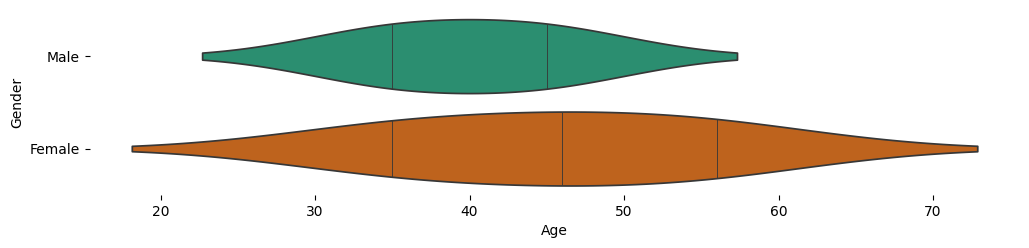

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-2179593187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_12, x='Age', y='City', inner='stick', palette='Dark2')


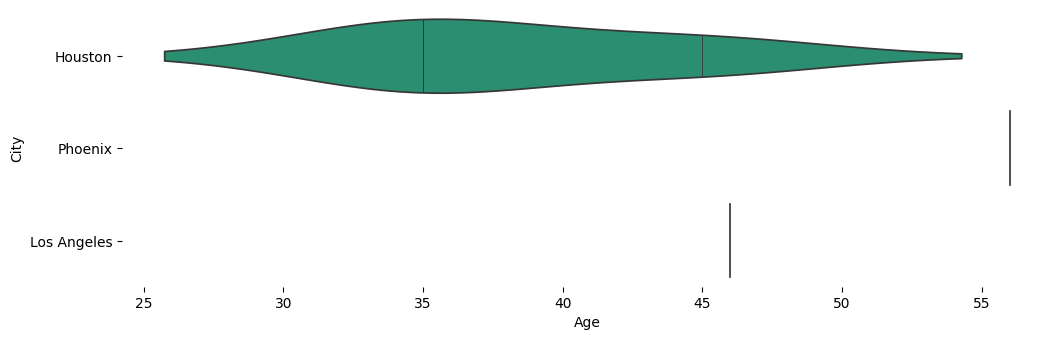

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Age', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-1472699327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_11, x='Age', y='Income', inner='stick', palette='Dark2')


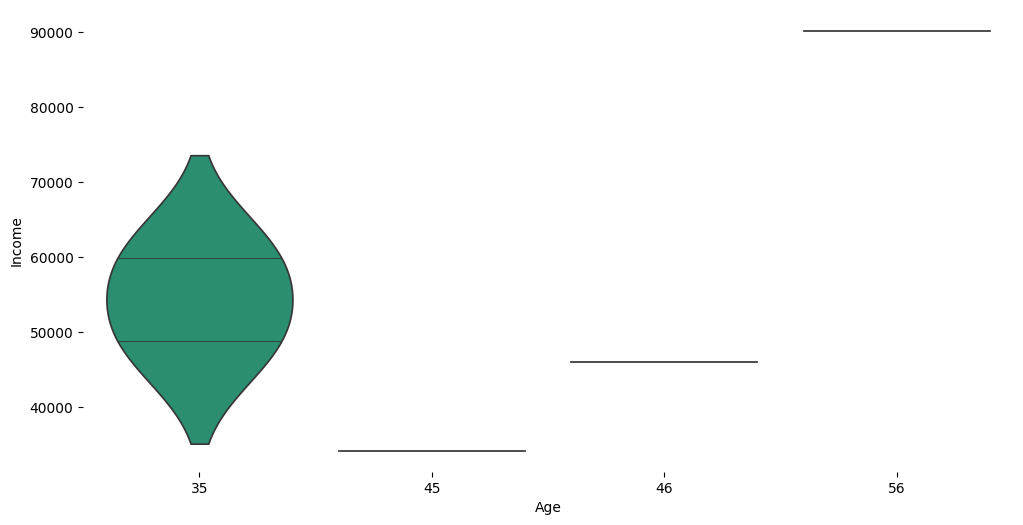

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Income'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Age', y='Income', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-963375018.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_10, x='Age', y='Education', inner='stick', palette='Dark2')


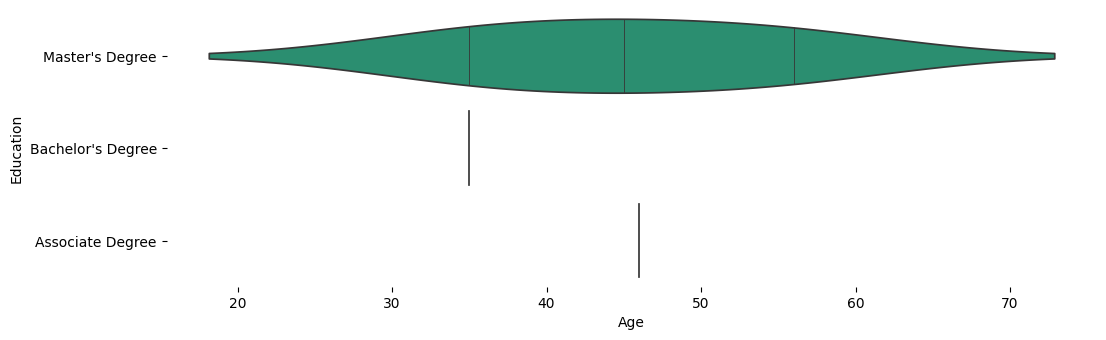

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Age', y='Education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
import matplotlib.pyplot as plt

In [50]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(array([68., 55., 52., 57., 52., 43., 49., 57., 54., 63.]),
 array([ 25028.,  34522.,  44016.,  53510.,  63004.,  72498.,  81992.,
         91486., 100980., 110474., 119968.]),
 <BarContainer object of 10 artists>)

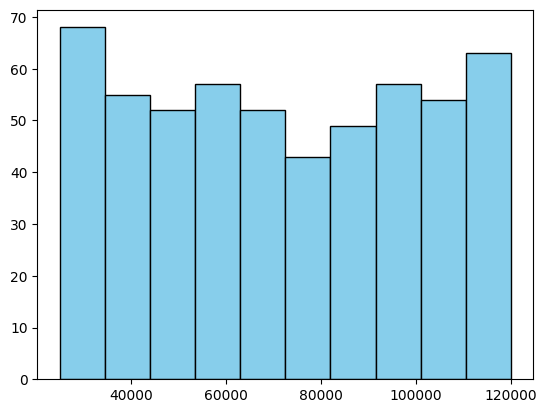

In [51]:
plt.hist(df['Income'], bins=10, color='skyblue', edgecolor='black')

Text(0, 0.5, 'Frequency')

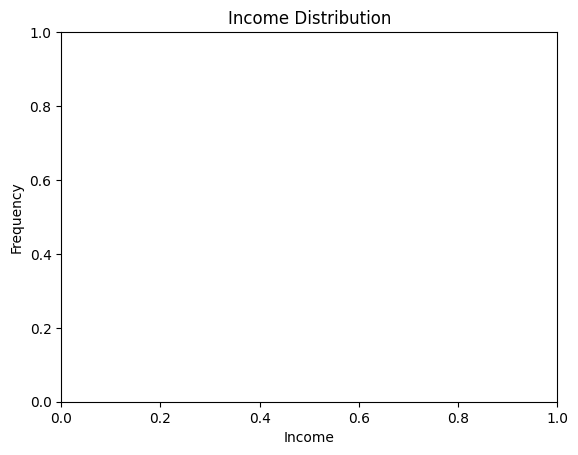

In [52]:
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>